<h1 ><big><center>MVA-Deep learning 2018/2019</center></big></h1>
<h2><big><center> Project 1: Image Classification and Regression</center></big></h2>
<h5><big><center> STUDENT : Yue QIAO </center></big></h5>
<h5><big><center> EMAIL : yue.qiao@ens-paris-saclay.fr </center></big></h5>

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
import os
import sys

!mkdir -p drive
!google-drive-ocamlfuse drive
os.chdir("drive/Colab Notebooks/TD1") 

In [6]:
from mp1 import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout, UpSampling2D, Input,concatenate
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers.normalization import BatchNormalization
from keras.models import Model

Using TensorFlow backend.


### 3 - Simple Classification

In [0]:
def simpleNet(X_train,Y_train):
    # Defining the Network
    model = Sequential()
    model.add(Dense(3, input_shape=(X_train.shape[1],)))
    model.add(Activation('softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(X_train, np_utils.to_categorical(Y_train), epochs=20, batch_size=32)
    return model


In [0]:
# Generating Training Data
[X_train, Y_train] = generate_dataset_classification(300, 20)
# Train model
simple_model = simpleNet(X_train,Y_train)

Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 1.6969 - acc: 0.4633
Epoch 2/20
300/300 [==============================] - 0s 175us/step - loss: 0.9714 - acc: 0.6033
Epoch 3/20
300/300 [==============================] - 0s 177us/step - loss: 0.5135 - acc: 0.7500
Epoch 4/20
300/300 [==============================] - 0s 180us/step - loss: 0.3712 - acc: 0.9000
Epoch 5/20
300/300 [==============================] - 0s 178us/step - loss: 0.3072 - acc: 0.9000
Epoch 6/20
300/300 [==============================] - 0s 173us/step - loss: 0.2514 - acc: 0.9667
Epoch 7/20
300/300 [==============================] - 0s 175us/step - loss: 0.2235 - acc: 0.9733
Epoch 8/20
300/300 [==============================] - 0s 171us/step - loss: 0.1951 - acc: 0.9767
Epoch 9/20
300/300 [==============================] - 0s 202us/step - loss: 0.1858 - acc: 0.9700
Epoch 10/20
300/300 [==============================] - 0s 187us/step - loss: 0.2205 - acc: 0.9067
Epoch 11/20
300/300 [==========

In [0]:
# Test
X_test_disk= generate_a_disk()
X_test_disk = X_test_disk.reshape(1, X_test_disk.shape[0])
print(simple_model.predict(X_test_disk))
X_test_rect= generate_a_rectangle()
X_test_rect = X_test_rect.reshape(1, X_test_rect.shape[0])
print(simple_model.predict(X_test_rect))
X_test_tri= generate_a_triangle()[0]
X_test_tri = X_test_tri.reshape(1, X_test_tri.shape[0])
print(simple_model.predict(X_test_tri))

[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 0. 1.]]


We can see from the result that whether it is a triangle, a disk or a rectangle, it can be predicted successfully.

### 4 - Visualization of the Solution

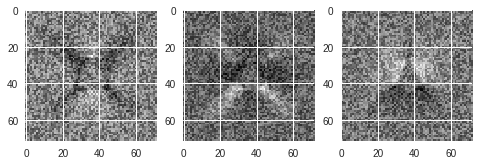

In [0]:
w1 = simple_model.get_weights()[0][:,0]
w2 = simple_model.get_weights()[0][:,1]
w3 = simple_model.get_weights()[0][:,2]

plt.subplot(1,3,1)
plt.imshow(w1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(w2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(w3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

###  5 - A More Difficult Classification Problem

In [0]:
def CNN_Model(X_train, Y_train):
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu',padding='same',input_shape=[IMAGE_SIZE,IMAGE_SIZE,1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train, np_utils.to_categorical(Y_train), batch_size=32, epochs=30)
    return model

In [0]:
# More Difficult Classification Problem
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
# Train model
simple_model = simpleNet(X_train,Y_train)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 2.3489 - acc: 0.2833
Epoch 2/20
300/300 [==============================] - 0s 181us/step - loss: 1.6221 - acc: 0.3367
Epoch 3/20
300/300 [==============================] - 0s 181us/step - loss: 1.1540 - acc: 0.4400
Epoch 4/20
300/300 [==============================] - 0s 180us/step - loss: 1.0845 - acc: 0.4933
Epoch 5/20
300/300 [==============================] - 0s 180us/step - loss: 1.1739 - acc: 0.4300
Epoch 6/20
300/300 [==============================] - 0s 237us/step - loss: 0.9320 - acc: 0.5500
Epoch 7/20
300/300 [==============================] - 0s 183us/step - loss: 0.9797 - acc: 0.5233
Epoch 8/20
300/300 [==============================] - 0s 194us/step - loss: 0.9281 - acc: 0.5467
Epoch 9/20
300/300 [==============================] - 0s 178us/step - loss: 0.9436 - acc: 0.5333
Epoch 10/20
300/300 [==============================] - 0s 181us/step - loss: 0.9060 - acc: 0.5700
Epoch 11/20
300/300 [==========

In [0]:
cnn_model = CNN_Model(X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1),Y_train)

Epoch 1/30
300/300 [==============================] - 2s 8ms/step - loss: 1.1137 - acc: 0.3900
Epoch 2/30
300/300 [==============================] - 0s 554us/step - loss: 1.0908 - acc: 0.3833
Epoch 3/30
300/300 [==============================] - 0s 550us/step - loss: 1.0707 - acc: 0.4333
Epoch 4/30
300/300 [==============================] - 0s 557us/step - loss: 1.0302 - acc: 0.4567
Epoch 5/30
300/300 [==============================] - 0s 549us/step - loss: 0.9323 - acc: 0.5700
Epoch 6/30
300/300 [==============================] - 0s 547us/step - loss: 0.8317 - acc: 0.6133
Epoch 7/30
300/300 [==============================] - 0s 539us/step - loss: 0.7622 - acc: 0.6800
Epoch 8/30
300/300 [==============================] - 0s 541us/step - loss: 0.7124 - acc: 0.7033
Epoch 9/30
300/300 [==============================] - 0s 534us/step - loss: 0.6786 - acc: 0.7200
Epoch 10/30
300/300 [==============================] - 0s 532us/step - loss: 0.6617 - acc: 0.7133
Epoch 11/30
300/300 [==========

In [0]:
# Test
[X_test, Y_test] = generate_test_set_classification()
print("For test set:", simple_model.metrics_names, " = ", 
      simple_model.evaluate(X_test, Y_test))

# print(cnn_model.predict(X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)))
print("For test set:", cnn_model.metrics_names, " = ", 
      cnn_model.evaluate(X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1), Y_test))

300/300 [==============================] - 0s 108us/step
For test set: ['loss', 'acc']  =  [0.8186021232604981, 0.6133333333333333]
300/300 [==============================] - 1s 3ms/step
For test set: ['loss', 'acc']  =  [0.36527445673942566, 0.8633333341280619]


The value of the loss function when using deep network is 0.36, which is smaller than that of linear classifier. And the accuracy of deep network increases also to 0.86. Obviuosly in this more complicated case, the data is not completely linearly separable，thus linear claffifier is insufficient.

---



### 6 - A Regression Problem

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

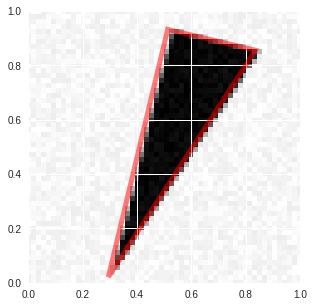

In [0]:
[X_train, Y_train] = generate_dataset_regression(5000, 20)
visualize_prediction(X_train[0], Y_train[0])


In [0]:
# sort three vertices according to the X coordinate from small to large
def sortY(Y_train):
  for i in range(Y_train.shape[0]):
    y_old = Y_train[i].copy()
    U = [y_old[0],y_old[2],y_old[4]]
    idx = np.argsort(U)
    Y_train[i]= [y_old[2*idx[0]], y_old[2*idx[0]+1], y_old[2*idx[1]], y_old[2*idx[1]+1], y_old[2*idx[2]], y_old[2*idx[2]+1]].copy()
  return Y_train.copy()
 

In [0]:
def Regressor(X_train,Y_train):
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu',input_shape=[IMAGE_SIZE,IMAGE_SIZE,1]))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=32, epochs=30)
    return model

In [0]:
sc = StandardScaler()
Y_train = sc.fit_transform(Y_train)
Y_train = sortY(Y_train)
regressor = Regressor(X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1),Y_train)

Epoch 1/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.5628 - acc: 0.5358
Epoch 2/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2026 - acc: 0.7152
Epoch 3/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1185 - acc: 0.7838
Epoch 4/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0810 - acc: 0.8128
Epoch 5/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0644 - acc: 0.8398
Epoch 6/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0455 - acc: 0.8630
Epoch 7/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0342 - acc: 0.8738
Epoch 8/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0262 - acc: 0.8782
Epoch 9/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0212 - acc: 0.8892
Epoch 10/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0196 - acc: 0.8942
Epoch 11/30
5000/5000 [=====

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


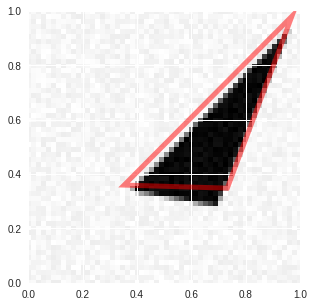

300/300 [==============================] - 1s 4ms/step
For test set: ['loss', 'acc']  =  [0.1229886641105016, 0.8100000007947286]


In [0]:
[X_test, Y_test] = generate_test_set_regression()
Y_test = sc.fit_transform(Y_test)
Y_test = sortY(Y_test)
Y_pred = regressor.predict(X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1))
Y_pred = sc.inverse_transform(Y_pred)
visualize_prediction(X_test[0], Y_pred[0])
print("For test set:", regressor.metrics_names, " = ", 
      regressor.evaluate(X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1), Y_test))

In this case, CNN performed better than the other networks. In addition, it is necessary to increase the amount of data and determine the order of three vertices according to a certain rule. Otherwise the result will be confusing.

### 7 - Image Denoising

In [0]:
def generate_a_paired_disks(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, np.random.randint(0,40))

def generate_a_paired_triangles(free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, np.random.randint(0,40))

def generate_a_paired_rectangles(free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, np.random.randint(0,40))

def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
#     print('Creating data:')
    for i in range(nb_samples):
#         if i % 10 == 0:
#             print(i)
        category = np.random.randint(3)
        if category == 0:
            Y[i], X[i] = generate_a_paired_rectangles(free_location)
        elif category == 1: 
            Y[i], X[i] = generate_a_paired_disks(free_location)
        else:
            Y[i], X[i] = generate_a_paired_triangles(free_location)
    return [X, Y]

In [0]:
 
def Hourglass():
    inputs=Input(shape=[IMAGE_SIZE,IMAGE_SIZE,1])
    conv1a=Conv2D(64, (3, 3),padding='same')(inputs)
    conv1a=BatchNormalization()(conv1a)
    conv1a=Activation('relu')(conv1a)
    conv1b=Conv2D(32, (2, 2),padding='same')(conv1a)
    conv1b=BatchNormalization()(conv1b)
    conv1b=Activation('relu')(conv1b)
    pool1=MaxPooling2D(pool_size=(2, 2))(conv1b)
    
    conv2a=Conv2D(64, (3, 3),padding='same')(pool1)
    conv2a=BatchNormalization()(conv2a)
    conv2a=Activation('relu')(conv2a)
    conv2b=Conv2D(32, (2, 2),padding='same')(conv2a)
    conv2b=BatchNormalization()(conv2b)
    conv2b=Activation('relu')(conv2b)
    pool2=MaxPooling2D(pool_size=(2, 2))(conv2b)
    
    
    up1=UpSampling2D(size=(2, 2))(pool2)
    up_conv1a=Conv2D(32, (2, 2),padding='same')(up1)
    up_conv1a=BatchNormalization()(up_conv1a)
    up_conv1a=Activation('relu')(up_conv1a)
    up_conv1b=Conv2D(64, (3, 3),padding='same')(up_conv1a)
    up_conv1b=Activation('relu')(up_conv1b)
    up_conv1b=BatchNormalization()(up_conv1b)
    
    up2=UpSampling2D(size=(2, 2))(up_conv1b)
    up_conv2a=Conv2D(32, (2, 2), padding='same')(up2)
    up_conv2a=BatchNormalization()(up_conv2a)
    up_conv2a=Activation('relu')(up_conv2a)
   # merge1 = concatenate([conv1b,up_conv2a], axis=3)
    up_conv2b=Conv2D(64, (3, 3),padding='same')(up_conv2a)
    up_conv2b=BatchNormalization()(up_conv2b)
    up_conv2b=Activation('relu')(up_conv2b)
    
    
    out=Conv2D(1, (3, 3), padding='same',activation='sigmoid')(up_conv2b)
    model= Model(input = inputs, output = out)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [0]:
X_train,Y_train = generate_dataset_denoising(300, free_location=True)

In [23]:
denoising_model = Hourglass()
denoising_model.fit(X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1),Y_train.reshape(Y_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1),validation_split=0.1, batch_size=32, epochs=30)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 270 samples, validate on 30 samples
Epoch 1/30
270/270 [==============================] - 5s 18ms/step - loss: -410.9032 - acc: 0.0699 - val_loss: -1039.3514 - val_acc: 0.0857
Epoch 2/30
270/270 [==============================] - 1s 4ms/step - loss: -1093.2126 - acc: 0.0765 - val_loss: -2382.8345 - val_acc: 0.0860
Epoch 3/30
270/270 [==============================] - 1s 4ms/step - loss: -1664.9087 - acc: 0.0751 - val_loss: -2983.0662 - val_acc: 0.0858
Epoch 4/30
270/270 [==============================] - 1s 4ms/step - loss: -2281.8479 - acc: 0.0734 - val_loss: -3359.8159 - val_acc: 0.0859
Epoch 5/30
270/270 [==============================] - 1s 4ms/step - loss: -2948.2176 - acc: 0.0754 - val_loss: -3534.5525 - val_acc: 0.0857
Epoch 6/30
270/270 [==============================] - 1s 4ms/step - loss: -3474.3773 - acc: 0.0706 - val_loss: -3656.6089 - val_acc: 0.0691
Epoch 7/30
270/270 [==============================] - 1s 4ms/step - loss: -3656.0816 - acc: 0.0548 - val_loss: -365

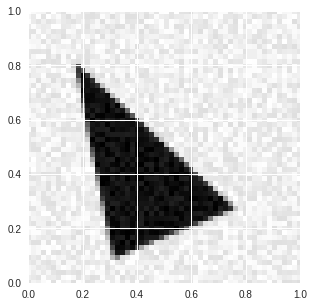

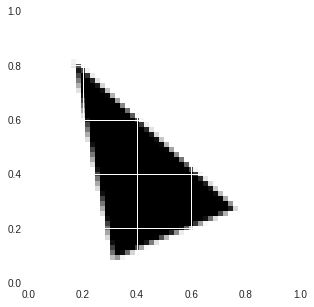

In [27]:
def visualize(x):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    plt.show()

X_test = generate_a_disk(20, False)
# Y = denoising_model.predict(X_test.reshape(1,IMAGE_SIZE,IMAGE_SIZE,1))
visualize(X_train[10])
visualize(Y_train[10])
# print(Y)


